# Job Postings Trend for Cloud Engineers (2.16.1) - Problem

Problem Statement: Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

Create a new DataFrame called df_ce that filters only job postings that are 'Cloud Engineer'
Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
Add a title 'Job Postings Trend for Cloud Engineers' and label the y-axis as 'Count of Job Postings'.

In [5]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter for Cloud Engineer roles
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

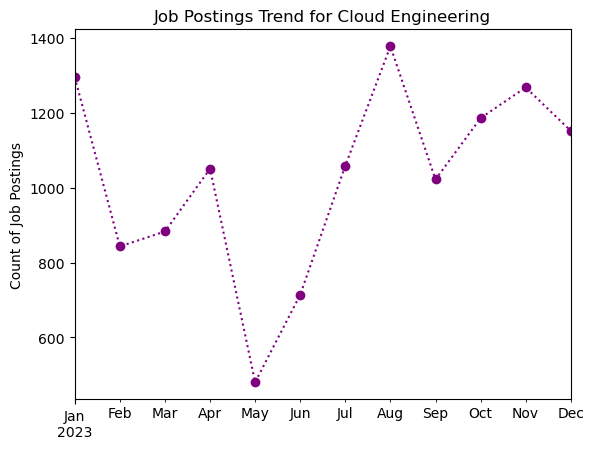

In [8]:
#Filter for Cloud Engineer roles
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()

df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')

monthly_job_postings = df_ce.groupby('job_posted_month').size()

monthly_job_postings.plot(
    kind='line',
    linestyle=':', 
    color='purple', 
    marker='o'
)

plt.title('Job Postings Trend for Cloud Engineering')
plt.xlabel('')
plt.ylabel('Count of Job Postings')
plt.show()